1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats

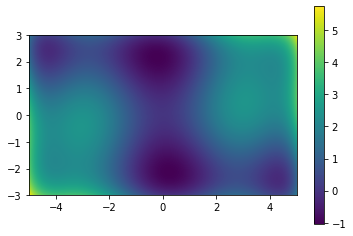

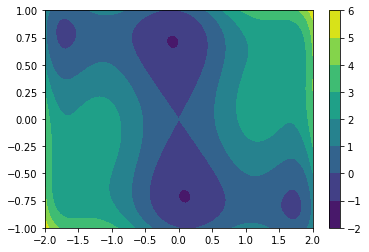

there are two global minimums:
global minimum 1 is : f( [ 0.08984184 -0.71265628] ) =  -1.0316284534896591
global minimum 2 is : f( [-0.08984185  0.71265627] ) =  -1.0316284534896496
and the global minimum with initial guess (0,0) is : f( [0. 0.] ) =  0.0


In [14]:
# 08ex - 1

def f(x):
    return (4 - 2.1*x[0]**2 + (x[0]**4)/3) * x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2

x = np.linspace(-2,2,1000)
y= np.linspace(-1,1,1000)

xx, yy = np.meshgrid(x, y, sparse=True)
z = f([xx,yy])
plt.figure()
plt.imshow(z, extent=[-5, 5, -3, 3], origin="lower")
plt.colorbar()
plt.show()

plt.figure()
h = plt.contourf(x,y,z)
plt.colorbar()
plt.show()

min_1 = optimize.minimize(f, [-2, -1])
min_2 = optimize.minimize(f, [+2, +1])

print("there are two global minimums:")
print("global minimum 1 is : f(",min_1.x,") = ",min_1.fun)
print("global minimum 2 is : f(",min_2.x,") = ",min_2.fun)

min_3 = optimize.minimize(f, [0, 0])
print("and the global minimum with initial guess (0,0) is : f(",min_3.x,") = ",min_3.fun)

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

paramas max [ 2.67499871e+01 -8.27094992e+10  1.56135373e+14]
paramas min [-3.96666647e+01 -3.45715292e+11 -9.37002185e+15]


c:\users\mz\appdata\local\programs\python\python39\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


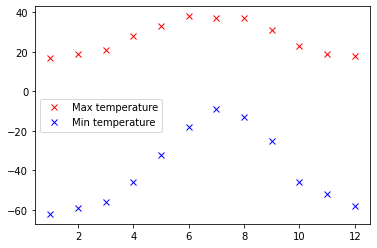

In [18]:
# 08ex - 2

max_t = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_t = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

# ploting temperatures
months = np.linspace(1, 12, 12)
plt.plot(months, max_t,'rx', label="Max temperature")
plt.plot(months, min_t,'bx', label="Min temperature")
plt.legend()

def gaussian(x,a, m, std):
    return a*np.exp(-(x-m)**2/(2*std**2))

mean = sum(months*max_t)/12    
sigma = sum(max_t*(months-mean)**2)/12 
params_max, params_covariance_max = optimize.curve_fit(gaussian, months, max_t, p0=[1,mean, sigma])
print("paramas max", params_max)
mean = sum(months*min_t)/12    
sigma = sum(min_t*(months-mean)**2)/12 
params_min, params_covariance_min = optimize.curve_fit(gaussian, months, min_t, p0=[1,mean, sigma])
print("paramas min", params_min)

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [3]:
# 08ex - 3

data = pd.DataFrame(dict(pd.read_pickle("residuals_261.pkl").item()))
data

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [38]:
data = data.loc[abs(data["residuals"]) < 2]
data

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


Parameters:  [ 1.28685138e+03 -8.55852144e-02 -2.26408830e-01]


C:\Users\MZ\AppData\Local\Temp/ipykernel_10676/3700991025.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(x = bin_centers, y = y, yerr = sigma_y, elinewidth = 6, fmt='.k', color = "black", linestyle = "None", label = "Error Bar")


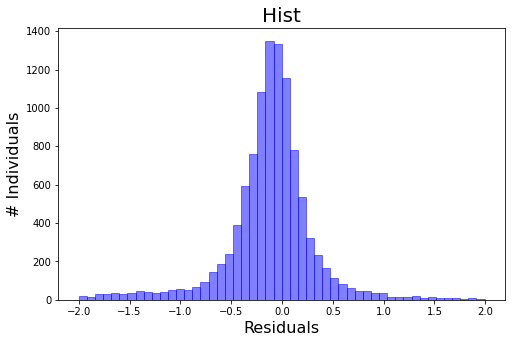

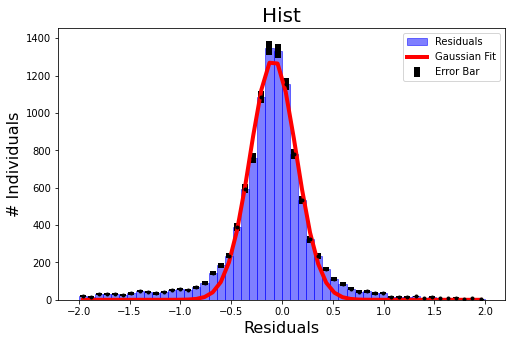

In [40]:
residuals = data["residuals"]

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Hist", fontsize = 20)
ax.set_xlabel("Residuals", fontsize = 16)
ax.set_ylabel("# Individuals", fontsize = 16)
y, bins, _ = plt.hist(residuals, bins = 50, color = "blue", alpha = 0.5, edgecolor = "blue", label = 'Residuals')

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Hist", fontsize = 20)
ax.set_xlabel("Residuals", fontsize = 16)
ax.set_ylabel("# Individuals", fontsize = 16)
plt.hist(residuals, bins = 50, color = 'blue', alpha = 0.5, edgecolor = "blue", label = 'Residuals')

sigma_y = np.sqrt(np.abs(y))
bin_centers = (bins[:-1] + bins[1:]) / 2

# not very clear error bar
ax.errorbar(x = bin_centers, y = y, yerr = sigma_y, elinewidth = 6, fmt='.k', color = "black", linestyle = "None", label = "Error Bar")

mean, sigma = stats.norm.fit(y)
popt, pcov = optimize.curve_fit(gaussian, bin_centers, y)
print("Parameters: ", popt)
redefined_y = gaussian(bin_centers, *popt)
ax.plot(bin_centers, redefined_y, "red", linewidth = 4, label = "Gaussian Fit")
plt.legend()
plt.show()

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

mean temp is:  9.261252084167237
hot average temp is:  24.907408333333336
cold average temp is:  -9.777784


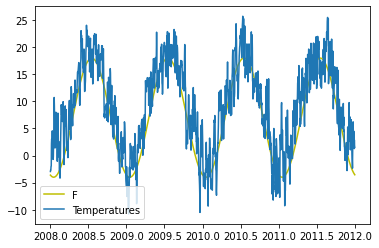

In [4]:
# 08ex - 4

def f(t,a,b,c): 
    return a * math.cos(2*np.pi*t + b) + c

data = pd.read_csv("munich_temperatures_average_with_bad_data.txt", sep=" ", header=None)
data.columns = ["Year", "Temperature"]

df = data[(data['Year'] > 2008) & (data['Year'] < 2012)].reset_index() #extracting desired columns in new dataframe
df = df.drop(df[df['Temperature'] == 99.].index).reset_index() #clearing data from bad samples

year = df['Year'].to_numpy()
temp = df['Temperature'].to_numpy()
mean_temp = np.mean(temp)
print("mean temp is: ",mean_temp)

a,b,c = -11,6,7
y1 = [f(year[i],a,b,c) for i in range(len(year))]

avg = df.nlargest(12, 'Temperature')
avg = avg[avg['Temperature'] != 99.]
hot = np.mean(avg['Temperature'].to_numpy())
print("hot average temp is: ", hot)

avg = df.nsmallest(10, 'Temperature')
cold = np.mean(avg['Temperature'].to_numpy())
print("cold average temp is: ", cold)

plt.plot(year, y1,'y', label = "F")
plt.plot(year, df['Temperature'], label = "Temperatures")
plt.legend()
plt.show()